fiat_image: advanced image widget
=================================

Fiatlight provides an advanced image viewer and analyzer which enables to zoom, pan, look at pixel values and sync the zoom across images.

Example
-------

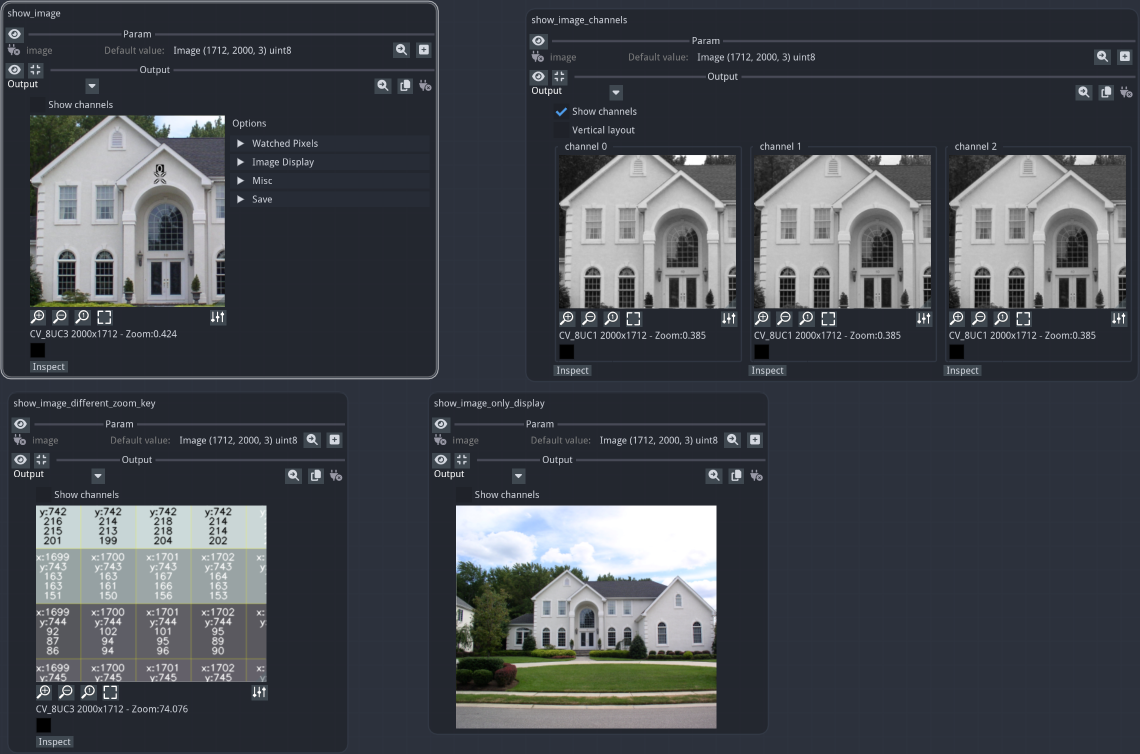

In [6]:
from fiatlight.fiat_kits.fiat_image import fiat_image_attrs_demo
fiat_image_attrs_demo.main()

> * In the "show_image" output, the options panel was opened
> * The "show_image_channels" output shows the image channels, and it zoom/pan is linked to "show_image"
> * The "show_image_different_zoom_key" image has a different zoom key, and the zoom/pan is not linked to "show_image".
    >   It also zoomed at a high-level, so that pixel values are displayed.
> * the "show_image_only_display" image is displayed, and cannot be zoomed or panned (the widget may be resized however)




Fiat attributes available for the ImageWithGui widget
-------------------------------------------------------

The image widget provided with fiat_image is extremely customizable. Here is a list of all the possible customizations options:

In [7]:
%%bash
fiatlight gui ImageWithGui

GUI type: ImageWithGui
  A highly sophisticated GUI for displaying and analysing images. Zoom/Pan, show channels, show pixel values, sync zoom accross images, etc.

  Available custom attributes for fiat_image.ImageWithGui:
  --------------------------------------------------------------------------------
  +---------------------------------+-----------------+-----------+-----------------------------------------------+
  | Name                            | Type            | Default   | Explanation                                   |
  +=================================+=================+===========+===============================================+
  |                                 |                 |           | **Main attributes for the image viewer**      |
  +---------------------------------+-----------------+-----------+-----------------------------------------------+
  | only_display                    | bool            | False     | Only display the image, no info displayed, no

Image types
-----------
Fiatlight provides several synonyms for Numpy arrays that denote different types of images. Each of these types will be displayed by the image widget.

In [3]:
import fiatlight
from fiatlight.fiat_notebook import look_at_code
%look_at_python_file fiat_kits/fiat_image/image_types.py

"""This module defines several types you can use to annotate your functions.
The image types are defined as NewType instances, which are just aliases for numpy arrays.

All those types will be displayed in the GUI as images, using the ImmVision image viewer
(https://github.com/pthom/immvision)

Notes:
    - The easiest way to display an image is to use the `Image` type, which is a union of all image types,
      or to use the `ImageU8` type, which is a union of all UInt8 image types.
    - any numpy array can be used to create an `Image`, and the viewer will try to display it
"""

from typing import Any, NewType
import numpy as np
from typing import Tuple, Union

# Define shape types for clarity
ShapeHeightWidth = Tuple[int, int]
ShapeHeightWidthChannels = Tuple[int, int, int]

# Define UInt8 as a dtype for numpy arrays
UInt8 = np.dtype[np.uint8]
AnyFloat = np.dtype[np.floating[Any]]


#
# UInt8 Images
#
# ImageU8 = NewType("ImageU8", np.ndarray[ShapeHeightWidthChannels | ShapeHeightWidth, UInt8])
# Type definitions for UInt8 images based on channel count
ImageU8_1 = NewType("ImageU8_1", np.ndarray[ShapeHeightWidth, UInt8])
ImageU8_2 = NewType("ImageU8_2", np.ndarray[ShapeHeightWidthChannels, UInt8])
ImageU8_3 = NewType("ImageU8_3", np.ndarray[ShapeHeightWidthChannels, UInt8])
ImageU8_4 = NewType("ImageU8_4", np.ndarray[ShapeHeightWidthChannels, UInt8])
ImageU8_WithNbChannels = Union[ImageU8_1, ImageU8_2, ImageU8_3, ImageU8_4]
# Type definitions based on the roles of the channels
ImageU8_RGB = NewType("ImageU8_RGB", ImageU8_3)
ImageU8_RGBA = NewType("ImageU8_RGBA", ImageU8_4)
ImageU8_BGRA = NewType("ImageU8_BGRA", ImageU8_4)
ImageU8_BGR = NewType("ImageU8_BGR", ImageU8_3)
ImageU8_GRAY = NewType("ImageU8_GRAY", ImageU8_1)
ImageU8_WithChannelsRoles = Union[ImageU8_RGB, ImageU8_RGBA, ImageU8_BGRA, ImageU8_BGR, ImageU8_GRAY]

# Generic type for any 8-bit image
ImageU8 = Union[ImageU8_WithNbChannels, ImageU8_WithChannelsRoles]


#
# Float Images
#
# Type definitions for float images based on channel count
ImageFloat_1 = NewType("ImageFloat_1", np.ndarray[ShapeHeightWidth, AnyFloat])
ImageFloat_2 = NewType("ImageFloat_2", np.ndarray[ShapeHeightWidthChannels, AnyFloat])
ImageFloat_3 = NewType("ImageFloat_3", np.ndarray[ShapeHeightWidthChannels, AnyFloat])
ImageFloat_4 = NewType("ImageFloat_4", np.ndarray[ShapeHeightWidthChannels, AnyFloat])

# Generic type for any float image
ImageFloat = Union[ImageFloat_1, ImageFloat_2, ImageFloat_3, ImageFloat_4]


#
# Generic Image Type
#
# Image is a union of all image types
Image = Union[ImageU8, ImageFloat]


# ---------------------------- Register image type factories ----------------------------


def _register_image_type_factories() -> None:
    from fiatlight.fiat_togui.gui_registry import gui_factories
    from fiatlight.fiat_kits.fiat_image.image_gui import ImageWithGui

    prefix = "fiatlight.fiat_kits.fiat_image.image_types.Image"
    gui_factories().register_factory_name_start_with(prefix, ImageWithGui)
    gui_factories().register_factory_union(prefix, ImageWithGui)

`

Source code for the example
---------------------------

In [4]:
%look_at_python_file fiat_kits/fiat_image/fiat_image_attrs_demo.py

"""Demo how to set custom presentation attributes for the Image Widget (ImageWithGui)

Notes:
    - The custom attributes can be set using the decorator fl.with_fiat_attributes
    - In these examples, we intend to set custom attributes for the output of the
      functions, i.e. the returned value.
      As a consequence, the custom attributes are set in the return__...
      arguments of the decorator.
"""

import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import ImageU8_3
import cv2


# Our demo image
demo_image: ImageU8_3 = fl.imread_rgb(fl.demo_assets_dir() + "/images/house.jpg")  # type: ignore


# A simple function that will use the Image Widget with its default settings.
def show_image(image: ImageU8_3 = demo_image) -> ImageU8_3:
    return image


# A function whose output will initially show the channels
# Since it does not specify a zoom key,
# it will be zoomed and panned together with the image
# shown by "show_image"
@fl.with_fiat_attributes(return__show_channels=True)
def show_image_channels(image: ImageU8_3 = demo_image) -> ImageU8_3:
    return image


# A function whose output will have a different zoom key:
# it can be panned and zoomed, independently of the other images
@fl.with_fiat_attributes(return__zoom_key="other")
def show_image_different_zoom_key(image: ImageU8_3 = demo_image) -> ImageU8_3:
    return image


# A function that will use the Image Widget with custom attributes:
# - the image is displayed only (it cannot be zoomed or panned,
#   and the pixel values are not shown)
# - the image is displayed with a height of 300 pixels
#   (the width is automatically calculated)
# - the image cannot be resized
@fl.with_fiat_attributes(
    return__only_display=True,
    return__image_display_size=(0, 300),
    return__can_resize=False,
)
def show_image_only_display(image: ImageU8_3 = demo_image) -> ImageU8_3:
    return image


def main() -> None:
    graph = fl.FunctionsGraph()
    graph.add_function(show_image)
    graph.add_function(show_image_channels)
    graph.add_function(show_image_different_zoom_key)
    graph.add_function(show_image_only_display)

    fl.run(graph, app_name="fiat_image_fiat_attrs_demo")


if __name__ == "__main__":
    main()